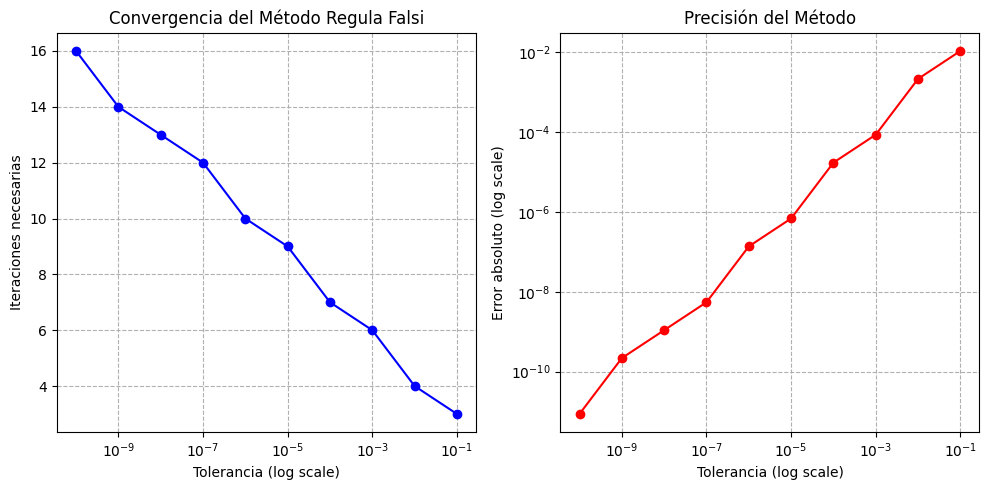

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def regula_falsi(f, a, b, tol=1e-6, max_iter=100):
    """Método de Regula Falsi para encontrar raíces."""
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) y f(b) deben tener signos opuestos.")

    iteraciones = 0
    c = a

    for iteraciones in range(max_iter):
        c_previo = c
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))

        if abs(f(c)) < tol:
            break

        if f(c) * f(a) < 0:
            b = c
        else:
            a = c

        if iteraciones > 0 and abs(c - c_previo) < tol:
            break

    return c, iteraciones + 1


# función a evaluar
def f(x):
    return x**2 - 4


# probamos diferentes tolerancias
tolerancias = np.logspace(-1, -10, num=10)  # [1e-1, 1e-2, ..., 1e-10]
iteraciones_necesarias = []
errores_absolutos = []

raiz_exacta = 2.0  # sabemos que la solución exacta es x=2

for tol in tolerancias:
    raiz_aprox, iteraciones = regula_falsi(f, 1, 3, tol)
    iteraciones_necesarias.append(iteraciones)
    errores_absolutos.append(abs(raiz_aprox - raiz_exacta))


# gráfico 1: Iteraciones vs Tolerancia
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.semilogx(tolerancias, iteraciones_necesarias, 'bo-')
plt.xlabel('Tolerancia (log scale)')
plt.ylabel('Iteraciones necesarias')
plt.title('Convergencia del Método Regula Falsi')
plt.grid(True, which="both", ls="--")

# gráfico 2: Error vs Tolerancia
plt.subplot(1, 2, 2)
plt.loglog(tolerancias, errores_absolutos, 'ro-')
plt.xlabel('Tolerancia (log scale)')
plt.ylabel('Error absoluto (log scale)')
plt.title('Precisión del Método')
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

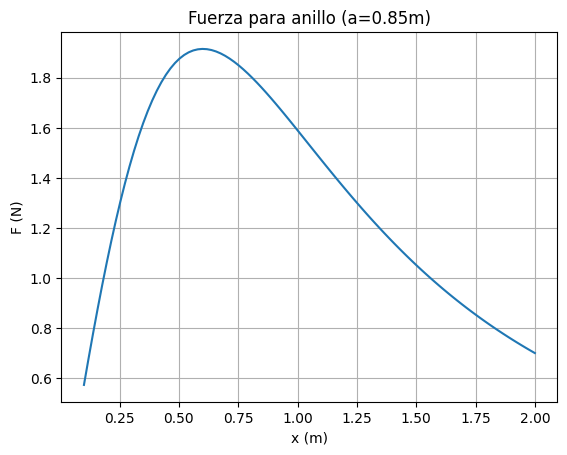

Newton: x=1.2974m, Bisección: x=1.2974m


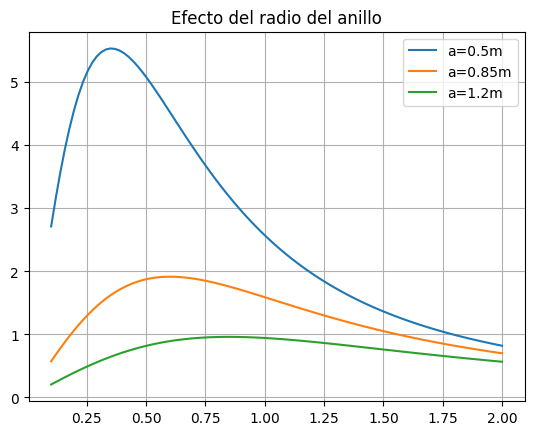

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import epsilon_0

def fuerza(a, x, q=2e-5, Q=2e-5):
    """Calcula la fuerza entre anillo cargado y carga puntual"""
    k = 1/(4*np.pi*epsilon_0)
    return k*q*Q*x/(x**2 + a**2)**1.5

# grafico F(x) para a=0.85m
a = 0.85
x = np.linspace(0.1, 2, 100)
F = [fuerza(a, xi) for xi in x]
plt.plot(x, F)
plt.title(f'Fuerza para anillo (a={a}m)')
plt.xlabel('x (m)'); plt.ylabel('F (N)')
plt.grid(); plt.show()

# metodos para F=1.25N
def newton(a, F_obj, x0=1, tol=1e-6):
    """Newton-Raphson para encontrar x dado F"""
    for _ in range(100):
        fx = fuerza(a, x0) - F_obj
        if abs(fx) < tol: break
        df = (fuerza(a, x0+1e-6) - fuerza(a, x0))/1e-6  # Derivada numérica
        x0 -= fx/df
    return x0

def biseccion(a, F_obj, xi=0.5, xf=1.5, tol=1e-6):
    """Bisección para encontrar x dado F"""
    for _ in range(100):
        xm = (xi+xf)/2
        fm = fuerza(a, xm) - F_obj
        if abs(fm) < tol: break
        if fm*fuerza(a, xi) < 0: xf = xm
        else: xi = xm
    return xm

x_nr = newton(a, 1.25)
x_bs = biseccion(a, 1.25)
print(f"Newton: x={x_nr:.4f}m, Bisección: x={x_bs:.4f}m")

# Efecto del radio
plt.figure()
for a in [0.5, 0.85, 1.2]:
    F = [fuerza(a, xi) for xi in x]
    plt.plot(x, F, label=f'a={a}m')
plt.title('Efecto del radio del anillo')
plt.legend(); plt.grid(); plt.show()

<ipython-input-5-a6f9675db628>:6: RuntimeWarning: invalid value encountered in log
  return u * np.log(m0 / (m0 - q*t)) - g*t


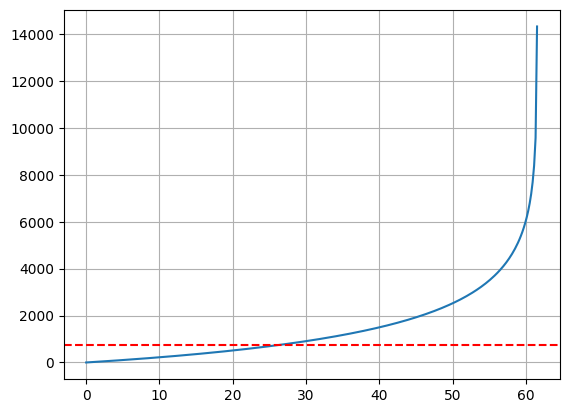

Newton: 26.41s, Bisección: 60.00s, Regula Falsi: 26.41s


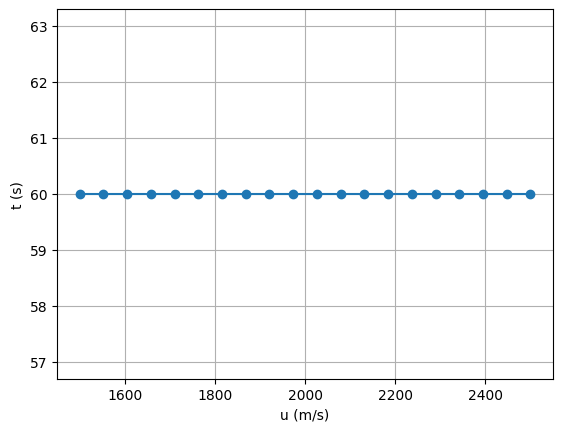

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def v(t, m0=1.6e5, u=1800, q=2600, g=9.81):
    """Velocidad del cohete: v = u*ln(m0/(m0-q*t)) - g*t"""
    return u * np.log(m0 / (m0 - q*t)) - g*t

# Gráfico velocidad-tiempo
t = np.linspace(0, 100, 500)
plt.plot(t, v(t))
plt.axhline(750, color='r', linestyle='--')
plt.grid(True); plt.show()

# Métodos numéricos para v=750 m/s
def newton(f, x0=50, tol=1e-6):
    for _ in range(100):
        fx = f(x0)
        if abs(fx) < tol: return x0
        df = (f(x0+1e-6)-f(x0))/1e-6  # Derivada numérica
        x0 -= fx/df
    return x0

def biseccion(f, a=40, b=60):
    for _ in range(100):
        c = (a+b)/2
        if abs(f(c)) < 1e-6: return c
        a, b = (a, c) if f(a)*f(c) < 0 else (c, b)
    return c

def regula_falsi(f, a=40, b=60):
    for _ in range(100):
        fa, fb = f(a), f(b)
        c = (a*fb - b*fa)/(fb - fa)
        if abs(f(c)) < 1e-6: return c
        a, b = (a, c) if f(a)*f(c) < 0 else (c, b)
    return c

f = lambda t: v(t) - 750
print(f"Newton: {newton(f):.2f}s, Bisección: {biseccion(f):.2f}s, Regula Falsi: {regula_falsi(f):.2f}s")

# Variación de u (1500 a 2500 m/s)
u_vals = np.linspace(1500, 2500, 20)
t_vals = [biseccion(lambda t: v(t, u=ui)-750) for ui in u_vals]

plt.plot(u_vals, t_vals, 'o-')
plt.xlabel('u (m/s)'); plt.ylabel('t (s)')
plt.grid(True); plt.show()